In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates() #удаляем строки с дубликатами

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T #удаляем столбцы с дубликатами 

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1) # 2 способ, удаляем столбцы с дубликатами 

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


In [7]:
data.nunique() == 1 #проверяем в каждом столбце сколько уникаьных значений, если один - там в этом столбце дубликаты

k1    False
k2    False
k3    False
k4     True
dtype: bool

# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [8]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [9]:
float_data.isna() #есть пропуски

0    False
1    False
2     True
3    False
dtype: bool

In [10]:
float_data.notna()  #нет пропусков

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [11]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [12]:
data.dropna() #удалаем где хоть 1 пропуск

,0,1,2,3


In [13]:
data.dropna(how="all") #где строки из пропусков ток состоят 

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [14]:
data.dropna(axis="columns", how="all") #где столбцы из пропусков ток состоят 

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [15]:
data.dropna(thresh=2) #где более 2 пропусков

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [16]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,0.287713,NaN,NaN
1,-1.372849,NaN,NaN
2,0.679481,NaN,0.440872
3,3.188392,NaN,2.046255
4,0.631323,-1.122763,-0.912575
5,0.381018,0.276129,2.115637
6,1.826272,-0.162726,0.390015


In [17]:
df.fillna(0)

,0,1,2
0,0.287713,0.000000,0.000000
1,-1.372849,0.000000,0.000000
2,0.679481,0.000000,0.440872
3,3.188392,0.000000,2.046255
4,0.631323,-1.122763,-0.912575
5,0.381018,0.276129,2.115637
6,1.826272,-0.162726,0.390015


In [18]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.287713,0.500000,0.000000
1,-1.372849,0.500000,0.000000
2,0.679481,0.500000,0.440872
3,3.188392,0.500000,2.046255
4,0.631323,-1.122763,-0.912575
5,0.381018,0.276129,2.115637
6,1.826272,-0.162726,0.390015


In [19]:
df.fillna(method="bfill") #снизу вверх заполянет 

,0,1,2
0,0.287713,-1.122763,0.440872
1,-1.372849,-1.122763,0.440872
2,0.679481,-1.122763,0.440872
3,3.188392,-1.122763,2.046255
4,0.631323,-1.122763,-0.912575
5,0.381018,0.276129,2.115637
6,1.826272,-0.162726,0.390015


In [20]:
df.fillna(method="bfill", limit=2) #снизу вверх заполянет ток 2 строчки вверх

,0,1,2
0,0.287713,NaN,0.440872
1,-1.372849,NaN,0.440872
2,0.679481,-1.122763,0.440872
3,3.188392,-1.122763,2.046255
4,0.631323,-1.122763,-0.912575
5,0.381018,0.276129,2.115637
6,1.826272,-0.162726,0.390015


In [21]:
df.fillna(data.mean()) #заполн по средней

,0,1,2
0,0.287713,6.500000,3.000000
1,-1.372849,6.500000,3.000000
2,0.679481,6.500000,0.440872
3,3.188392,6.500000,2.046255
4,0.631323,-1.122763,-0.912575
5,0.381018,0.276129,2.115637
6,1.826272,-0.162726,0.390015


In [22]:
df.fillna(data.median()) #заполн по медиане

,0,1,2
0,0.287713,6.500000,3.000000
1,-1.372849,6.500000,3.000000
2,0.679481,6.500000,0.440872
3,3.188392,6.500000,2.046255
4,0.631323,-1.122763,-0.912575
5,0.381018,0.276129,2.115637
6,1.826272,-0.162726,0.390015


Медиана более устойчива к выбросам

In [23]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0]) #генерируем выброс
    data_all.append(data)
    
data_all = np.array(data_all)

<AxesSubplot:>

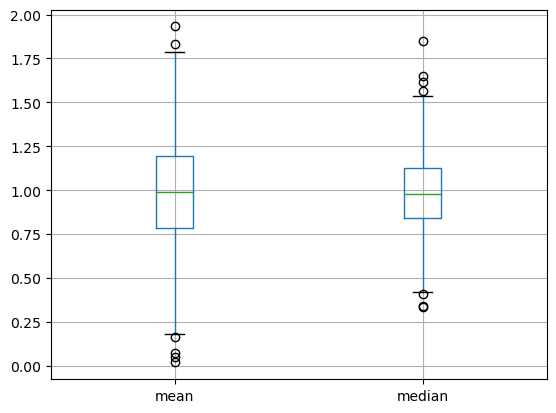

In [24]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [25]:
df["2 is nan"] = df[2].isna().astype(np.int32) #есть ли nan или нет
df

,0,1,2,2 is nan
0,0.287713,NaN,NaN,1
1,-1.372849,NaN,NaN,1
2,0.679481,NaN,0.440872,0
3,3.188392,NaN,2.046255,0
4,0.631323,-1.122763,-0.912575,0
5,0.381018,0.276129,2.115637,0
6,1.826272,-0.162726,0.390015,0


Замена значений

In [26]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [27]:
data.replace(-999, np.nan) #замена

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [28]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [29]:
(data == "male").astype(np.int32) #1 - мужчины, 0 - женщины

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [30]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Нет смысла в сравнении чисел, так как они ставят рандомно. Этот метод не очень 

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [37]:
poly = PolynomialFeatures(2) # 1, a, b, a^2, b^2 - генерирует это (для каждой строки)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

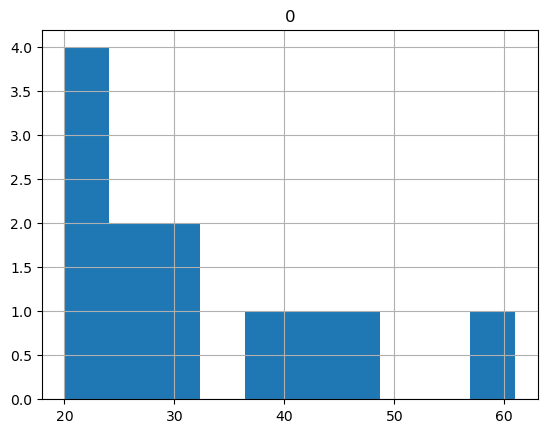

In [38]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [39]:
bins = [18, 25, 35, 60, 100] #инстевалы от 128 до 25, от 25 до 35, от 35 до 60 и тд.
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [40]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler() #нормализуем от 0 до 1
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [42]:
scaler = StandardScaler() #отнимает среднее и делит на СКО
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

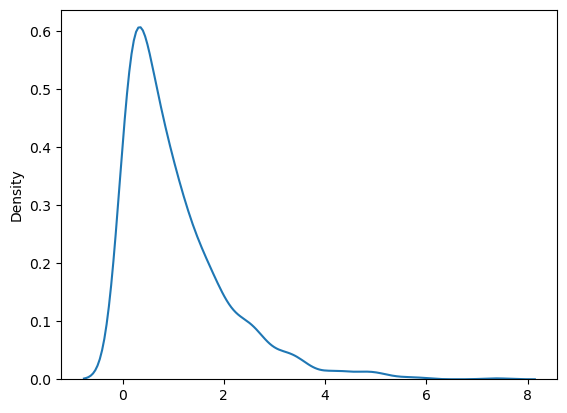

In [43]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000) #экспоненциальное распределение
sns.distplot(data, hist= False, kde= True)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

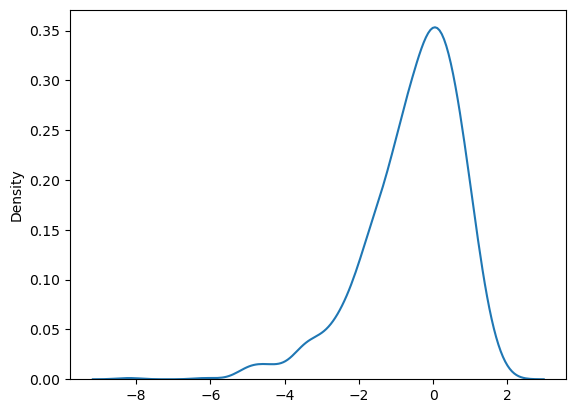

In [44]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

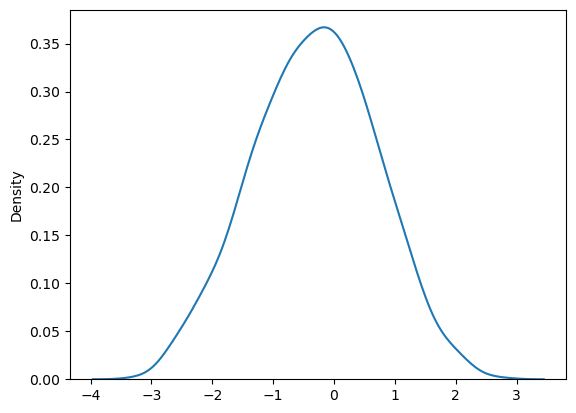

In [45]:
transformed_data, best_lambda = boxcox(data) #((х^лямбда) -1) /лямбда, при лямбда != 0, ln(x) если лямбда=0, лямбда через метод максимального правдоподобия

sns.distplot(transformed_data, hist=False , kde=True)

In [46]:
best_lambda

0.28134696672984

# Домашнее задание

In [134]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [135]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

Для начала познакомимся с общей информацей о датасете:

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

In [64]:
df.isna().sum() #проверим на наличие пропусков

index                             0
back-suspension                   0
battery-capacity                  0
charge-time                       0
compression                       0
consumption-mixed                 0
cylinders-order                   0
cylinders-value                   0
engine-feeding                    0
engine-start                      0
engine-stop                       0
engine-type                       0
gear-type                         0
luxury                            0
max-speed                         0
power-electro-kw                  0
supply-system                     0
valves                            0
valvetrain                        0
weight                            0
configurations_auto-premiere      0
configurations_back-wheel-base    0
configurations_front-brake        0
configurations_safety-rating      0
configurations_seats              0
configurations_tank-volume        0
supergen_year-stop                0
models_country-from         

С типами данных все хорошо, пропусков в данных тоже не наблюдается. Теперь проверим данные на наличие дубликатов: 

In [50]:
df.duplicated().sum() #проверяем строки с дубликатами

0

In [51]:
df.T.duplicated().sum() #проверяем столбцы с дубликатами

0

Дубликатов как по срокам, так и по столбцам в наших данных нет, тогда посмотрим на наличие выбрсов в каждом столбце, предварительно построив ящики с усами для каждого столбца. 

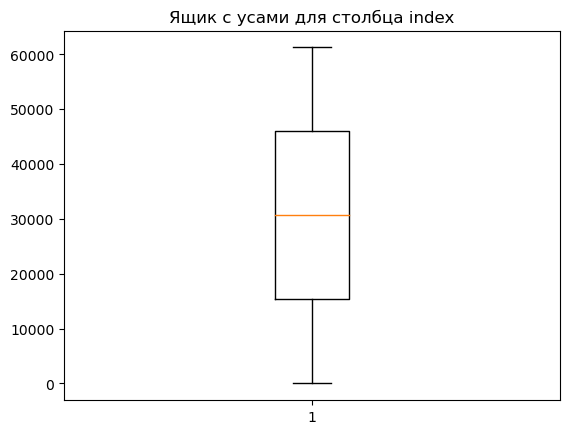

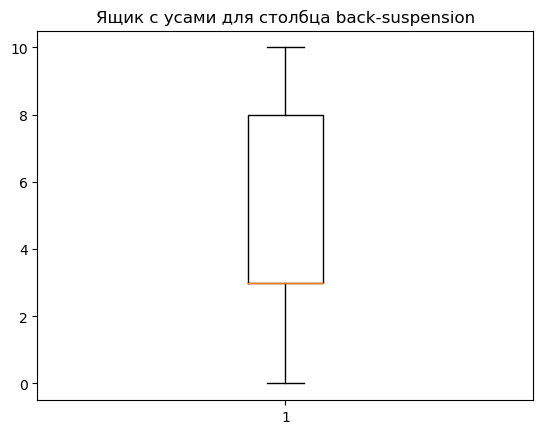

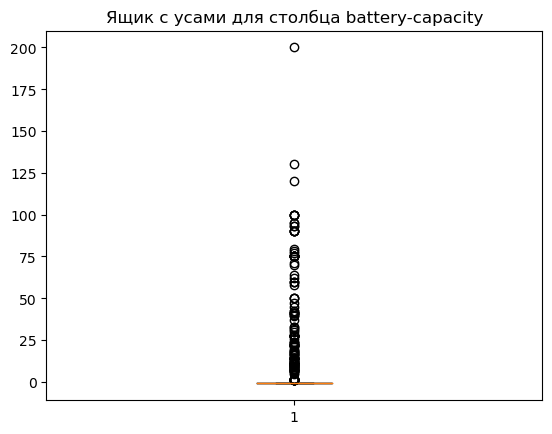

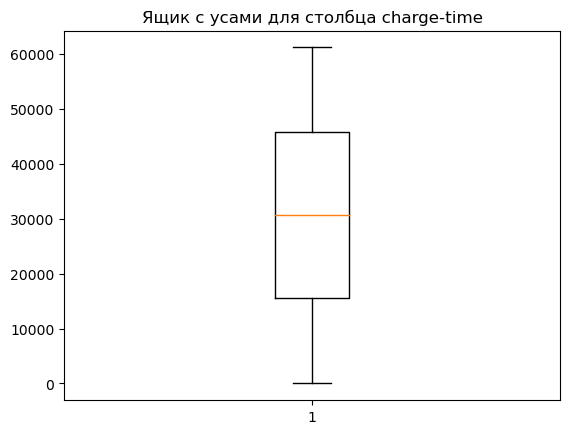

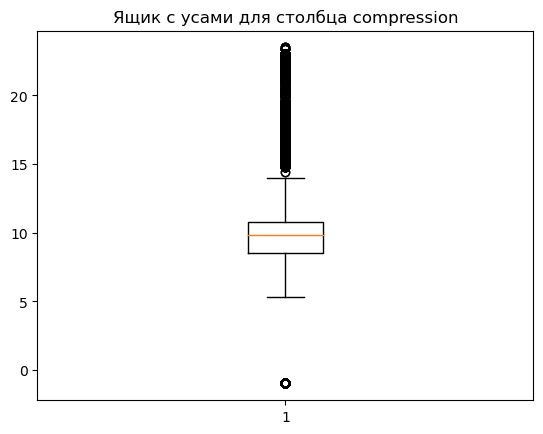

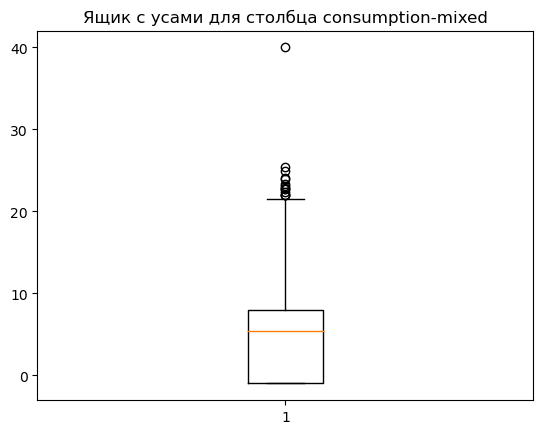

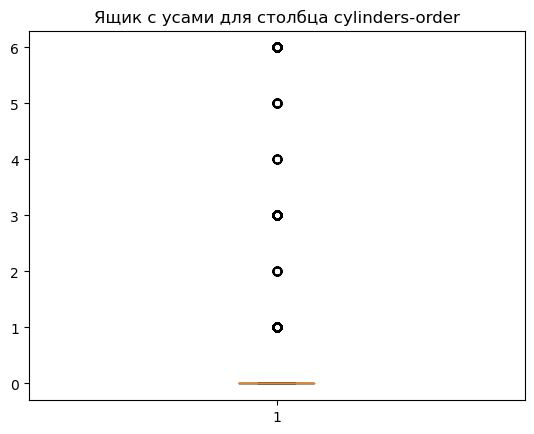

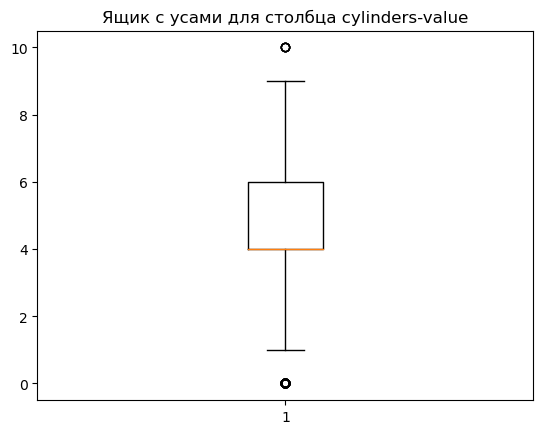

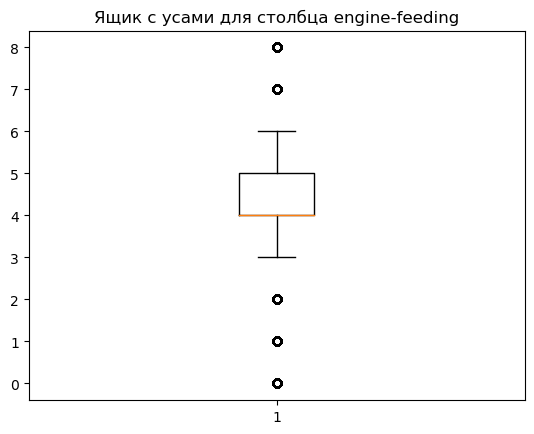

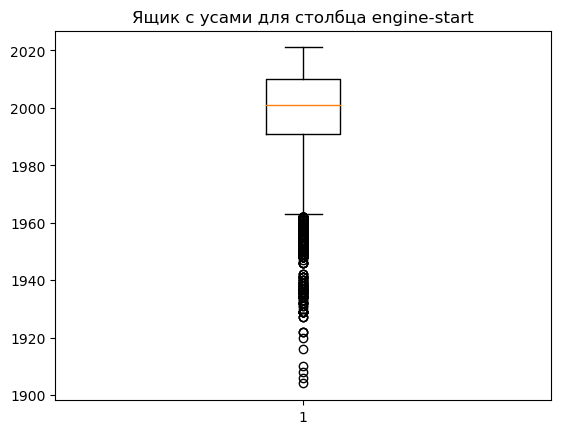

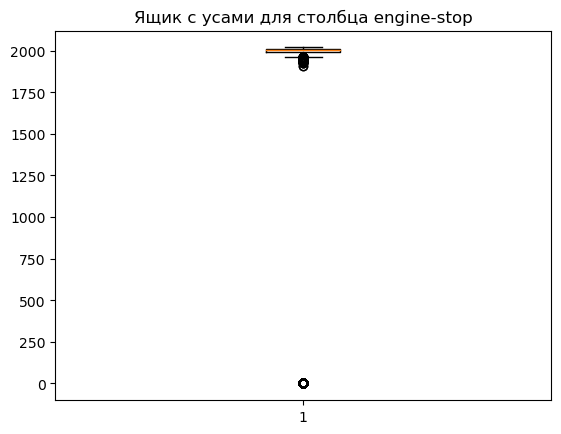

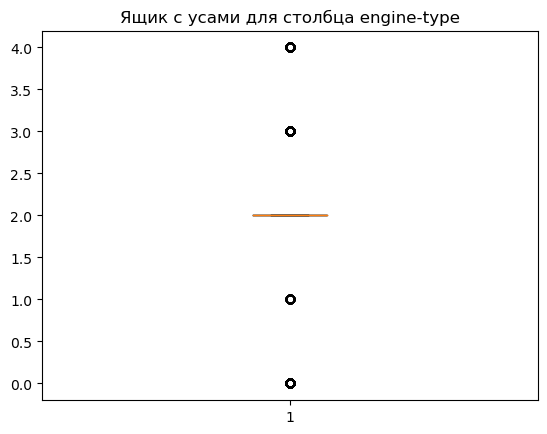

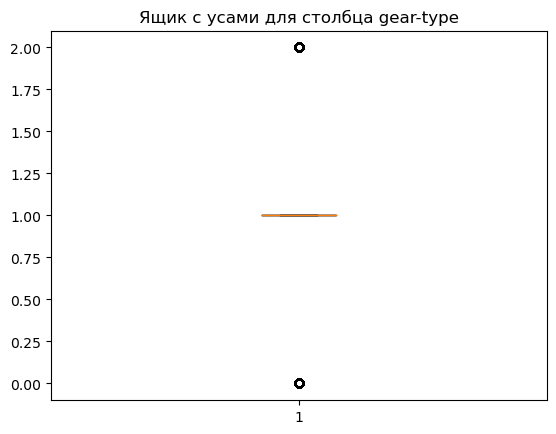

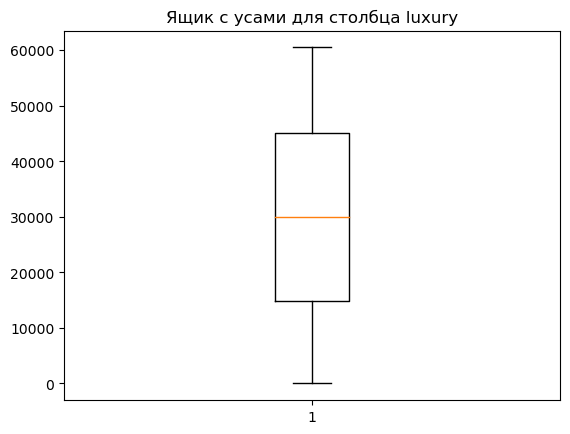

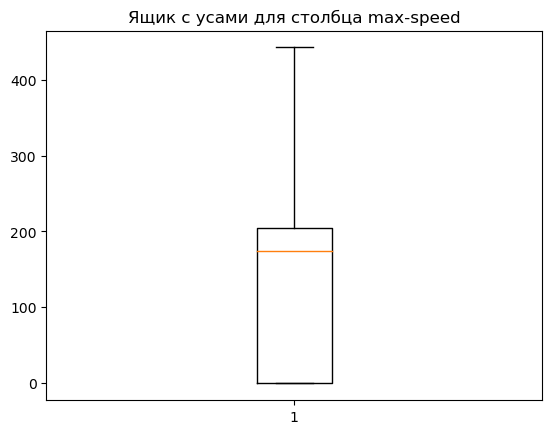

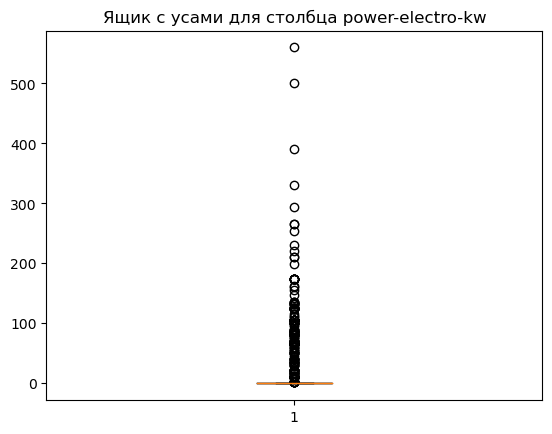

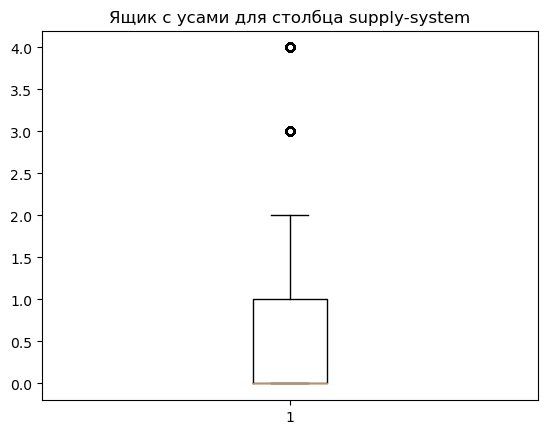

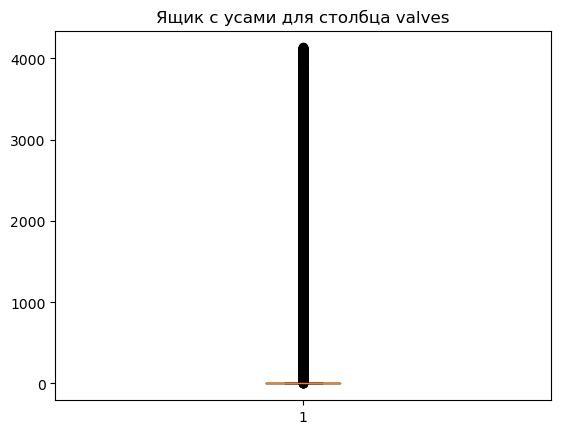

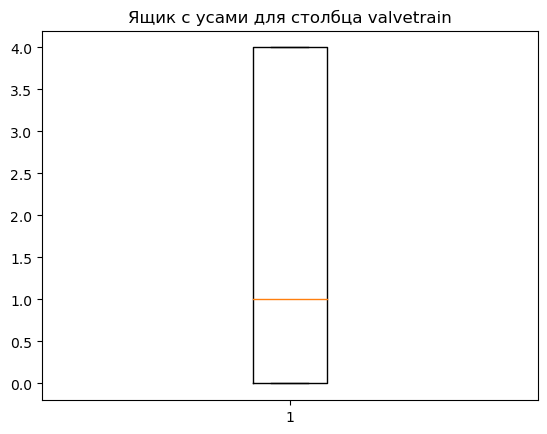

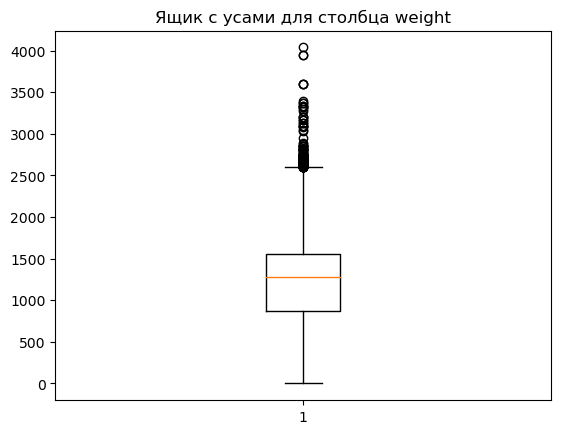

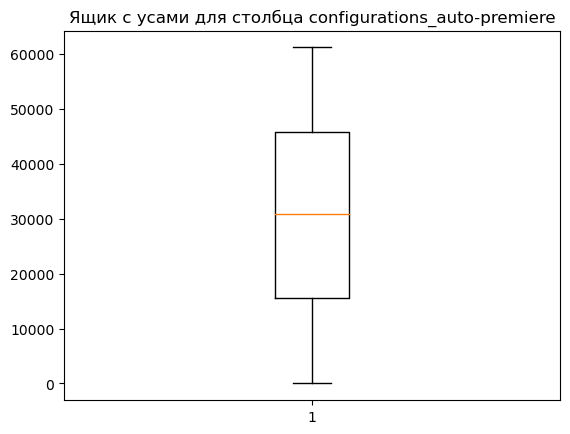

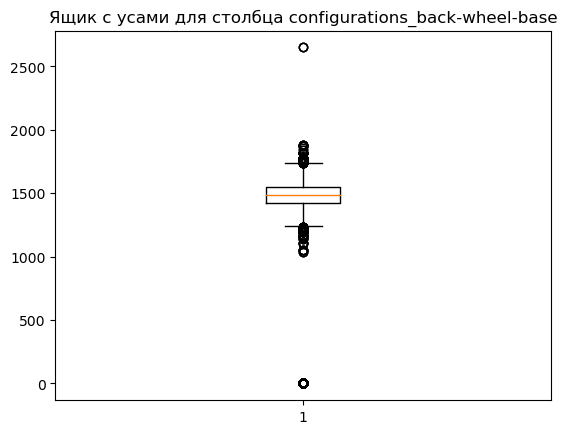

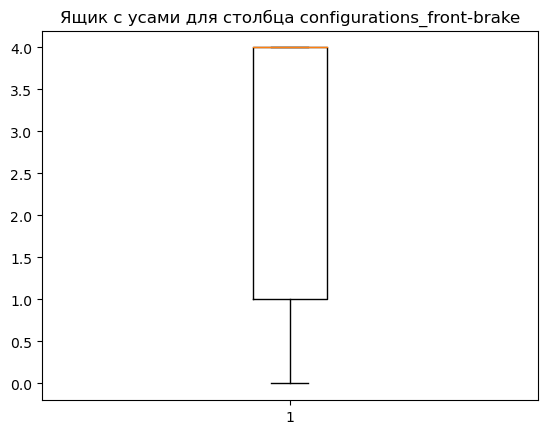

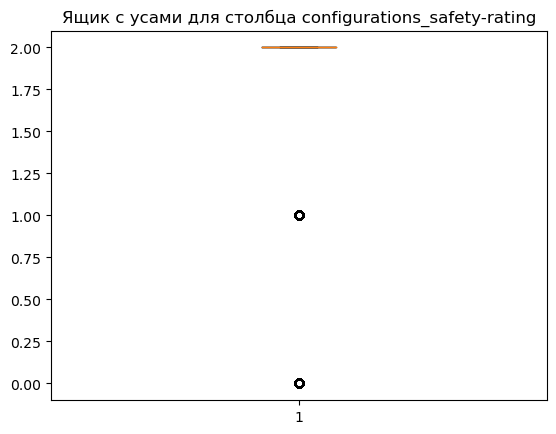

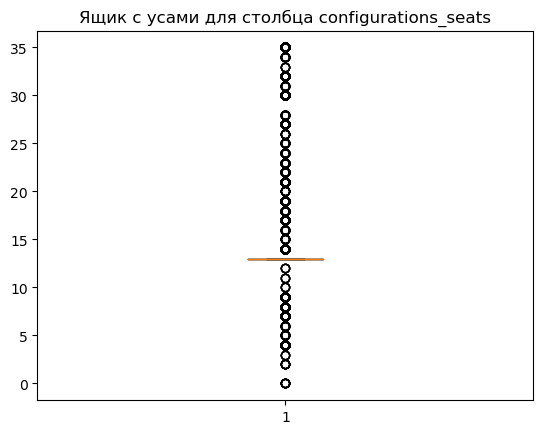

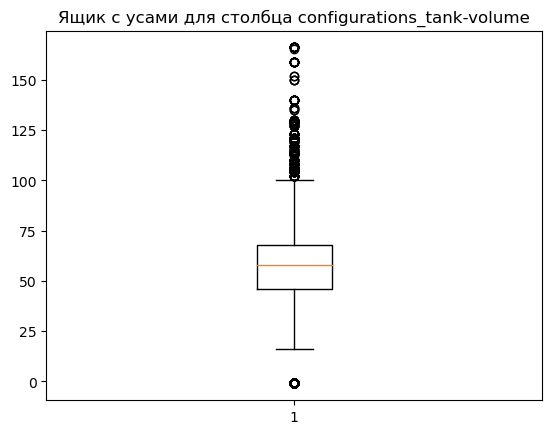

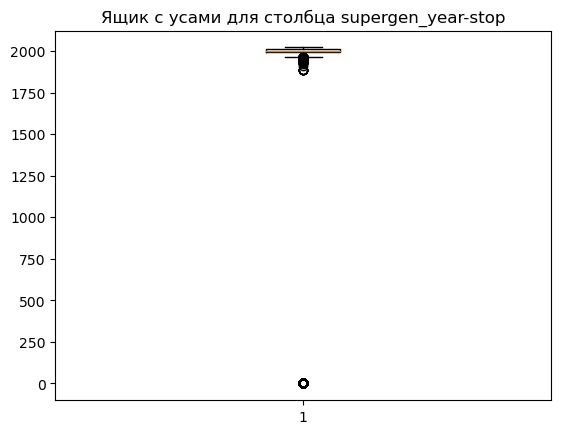

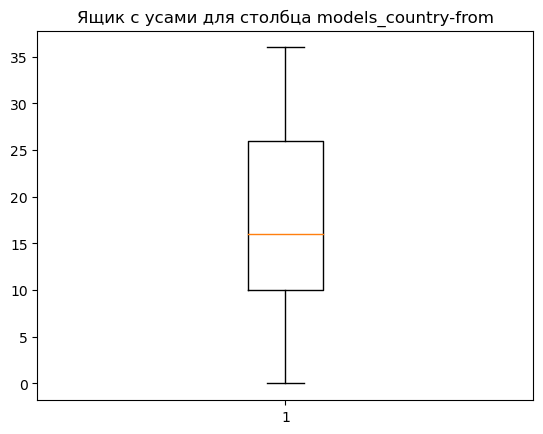

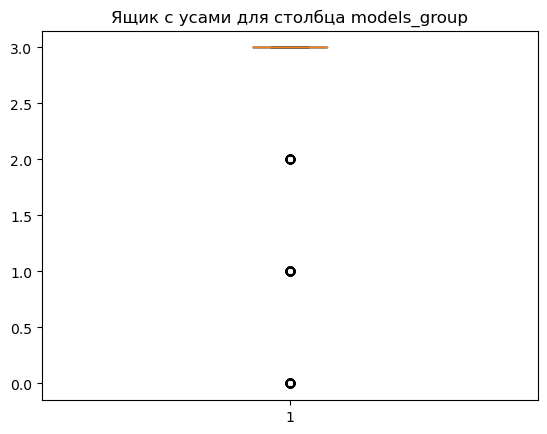

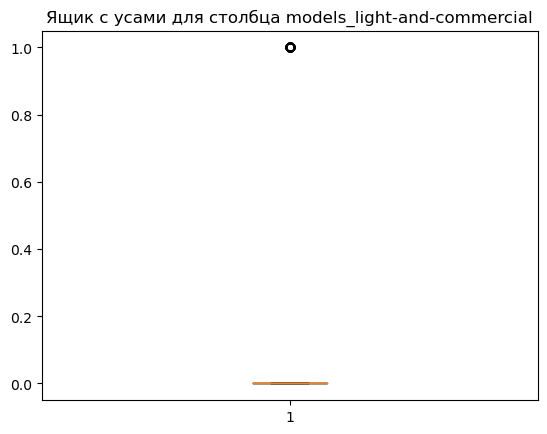

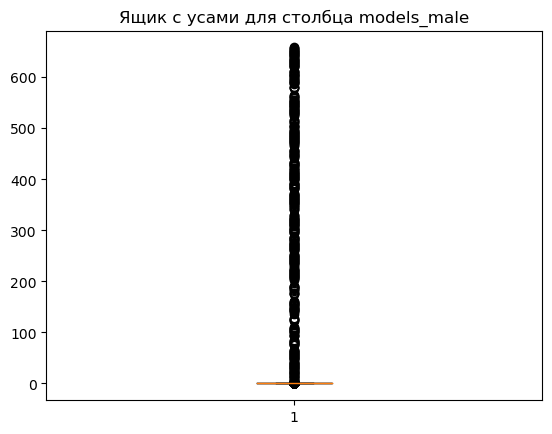

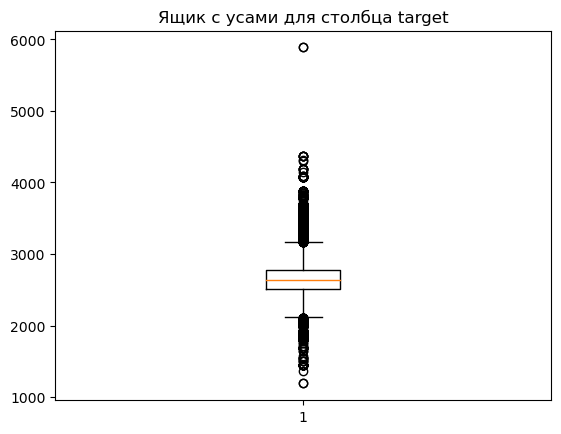

In [52]:
for i in df.columns:
    plt.boxplot(df[i]) #строим боксплоты
    plt.title(f'Ящик с усами для столбца {i}')
    plt.show()

In [106]:
#составим список столбцов с выбросами 
list_1 = ['battery-capacity', 'compression', 'consumption-mixed', 'cylinders-order', 'cylinders-value', 'engine-feeding', 'engine-start', 
          'engine-stop', 'power-electro-kw', 'supply-system', 'valves', 'weight', 'configurations_back-wheel-base', 
          'configurations_seats', 'configurations_tank-volume', 'supergen_year-stop', 'target']

Теперь, чтобы более полно видеть чистоту появления определенных числовых данных в каждом столбце посмотрим гистограмму частот. 

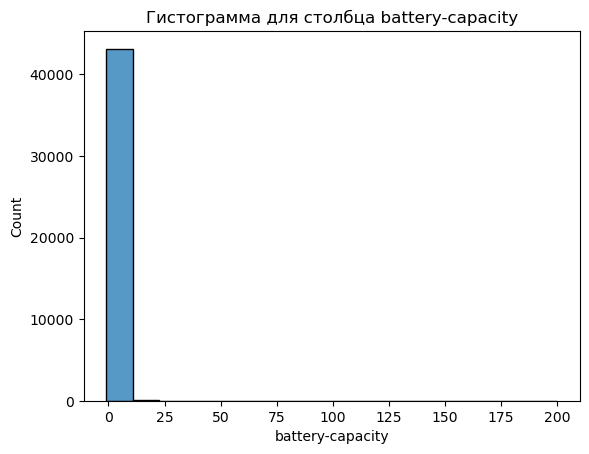

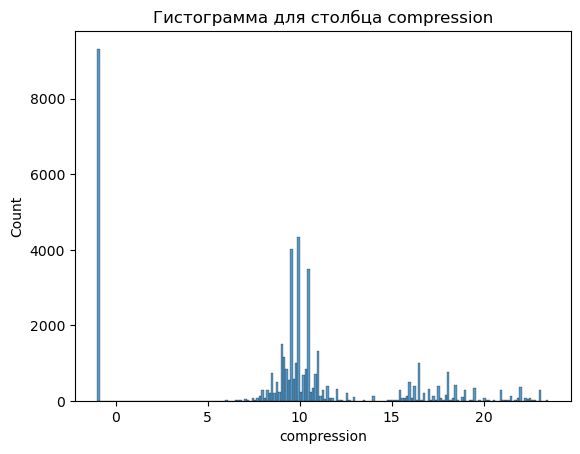

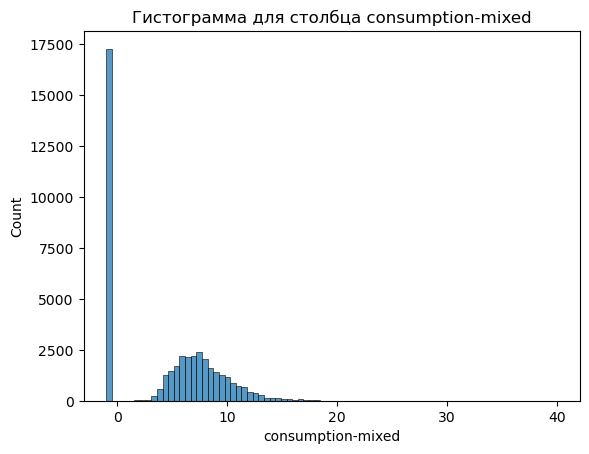

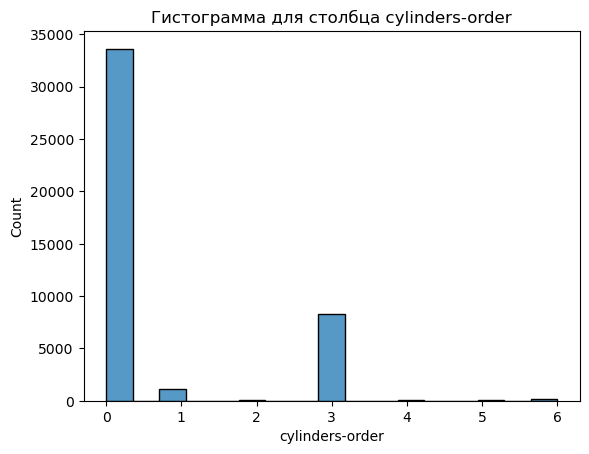

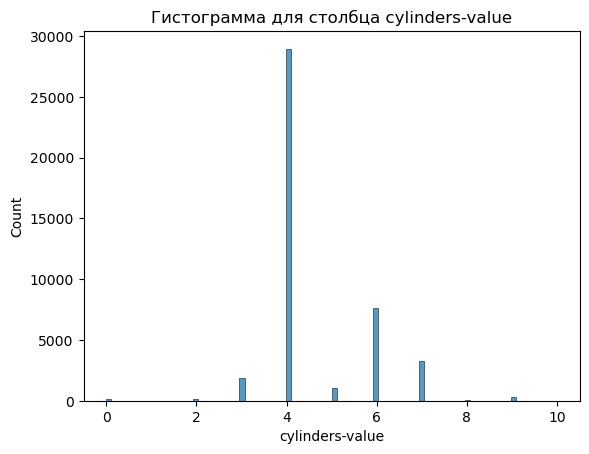

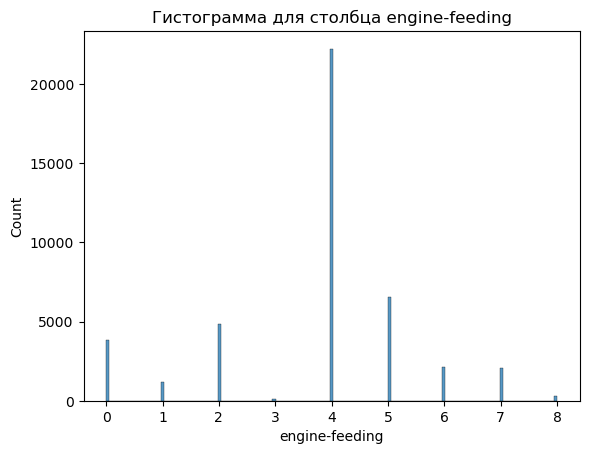

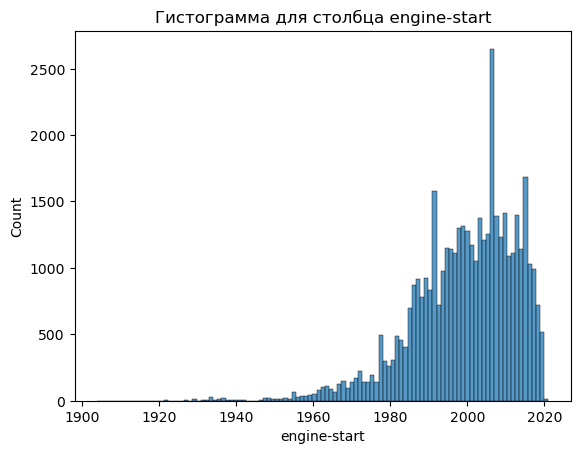

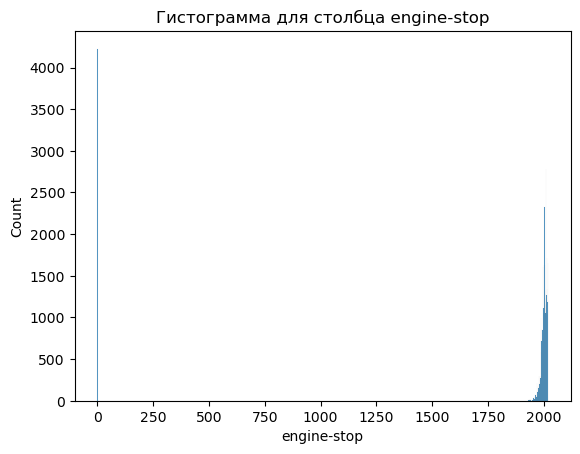

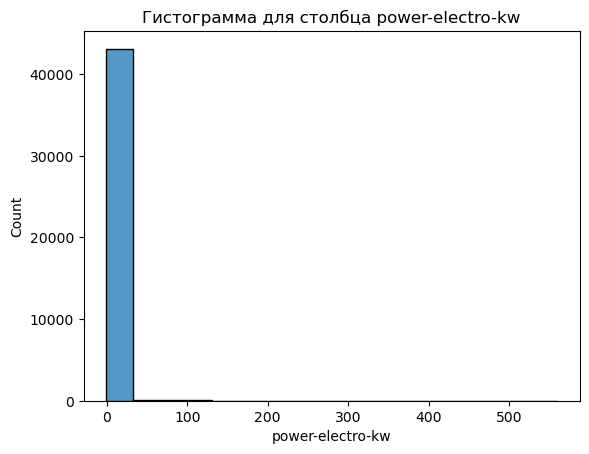

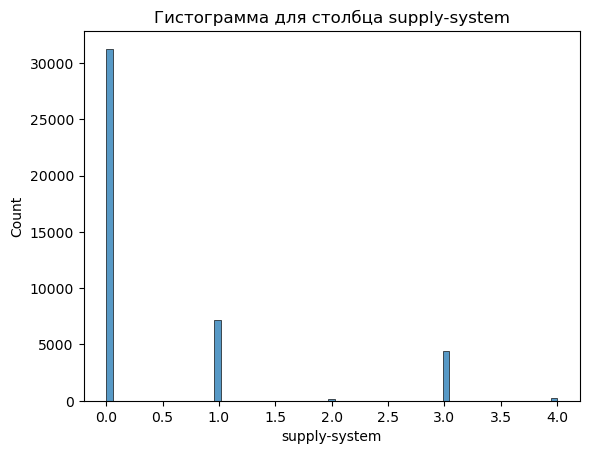

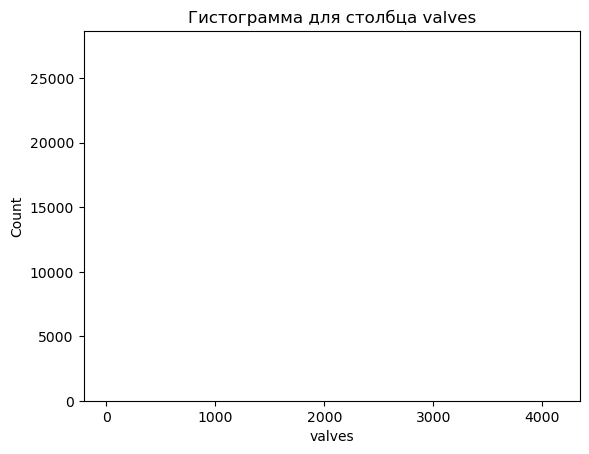

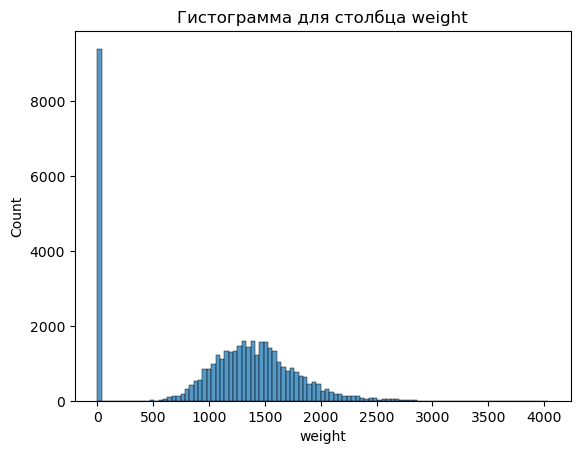

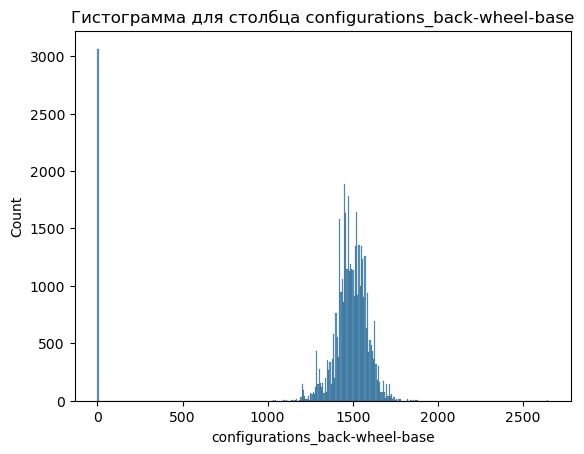

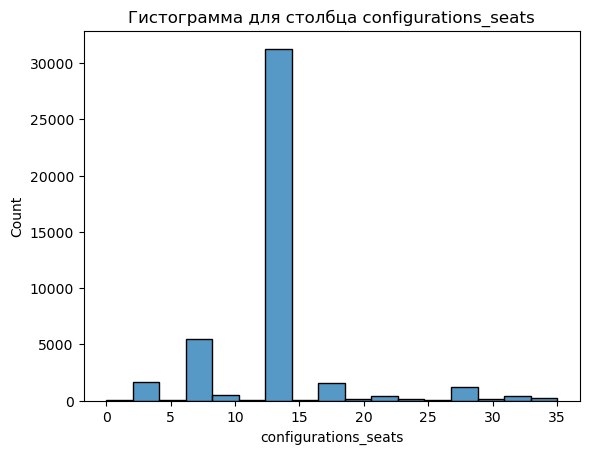

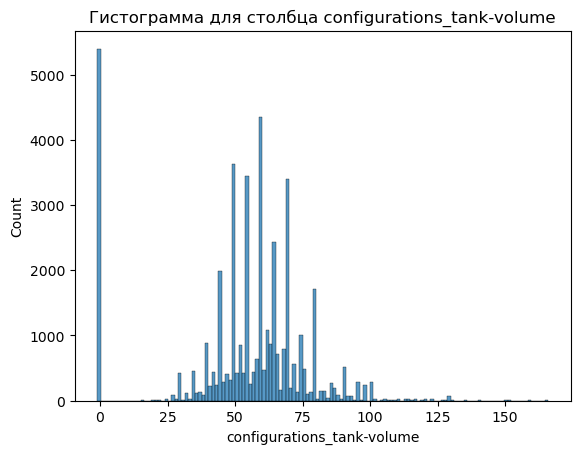

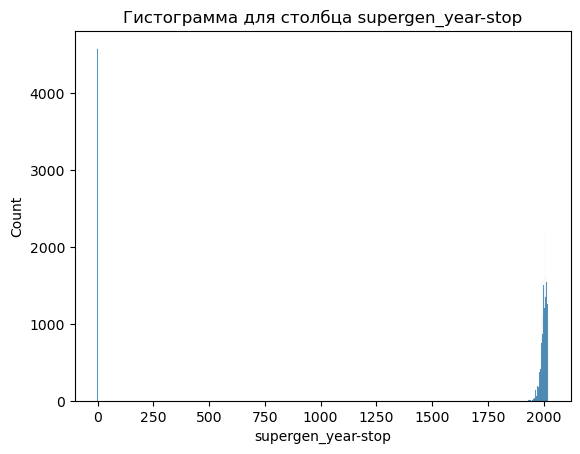

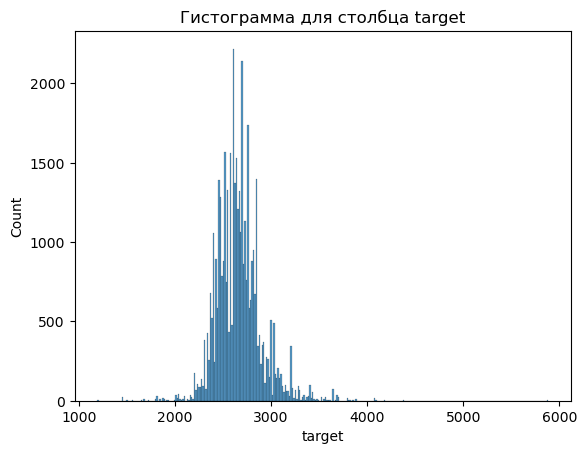

In [57]:
for i in list_1:
    sns.histplot(data=df[i])
    plt.title(f'Гистограмма для столбца {i}')
    plt.show()

<AxesSubplot:xlabel='valves', ylabel='Density'>

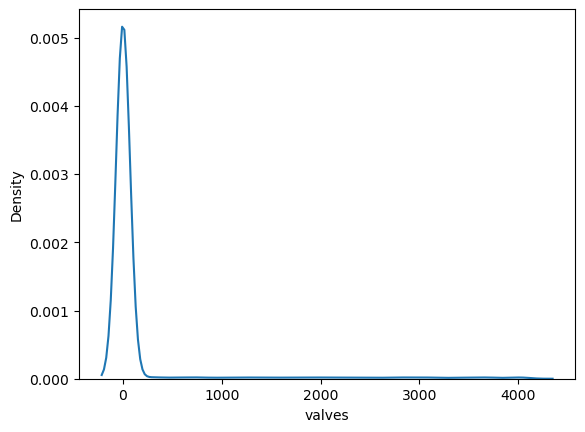

In [68]:
sns.kdeplot(data=df['valves'])

<AxesSubplot:xlabel='target', ylabel='Density'>

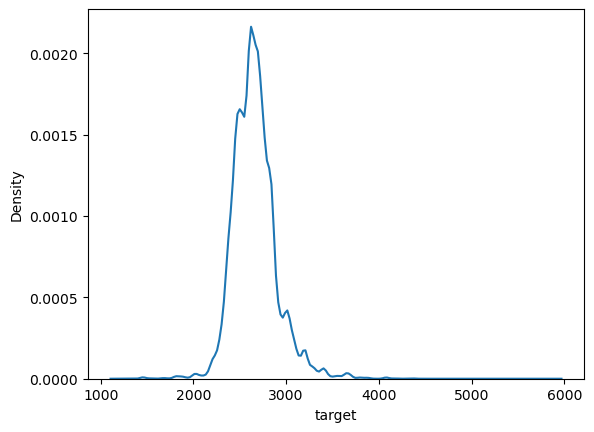

In [178]:
sns.kdeplot(data=df['target'])

Изначально я решила удалять выбросы по правилу трех сигм, чтобы сохранить побольше данных, после чего я построила регрессию (LinearRegression и Ridge) с детерминацией 0,61 и MSE около 14000, тогда я стала пытаться еще как-то преобразовать данные, чтобы снизить ошибку, но чтобы r^2 сохранился прежним или даже вырос, но не снизился. <br>

Я обратила внимание на то, что столбцы target и valves, weight имеют очень длинные хвосты, которые все равно остаются после двольно мягкого удаления треямя сигмами, поскольку массив данных позволяет, я решила очистить выбросы в этих столбцах более агрессивно через iqr. Сначала удалила выбросы в них, а потом удалила в дрругих столбцах через три сигмы. Все удалять через iqr не стала, так как это съедало половину данных и незначительно улучшало ситуацию (r^2 около 0,66 и MSE около 12 000), добиться этого же получилось и более щадящим удалением строк. 

Кроме того, выбросы удалялись не во всех столбцах из list_1, так как часть из них оказалась столбцами с классификацией и годом, которые не нужно удалять. 


Меня очень смутил столбец engine-stop, который означал год окончания чего-либо, на всякий случай я решила удалить нулевой год, чтобы логически не нарушать структуру данных. Со столбцом engine-start таких проблем не возникло. 

<AxesSubplot:xlabel='engine-stop', ylabel='Density'>

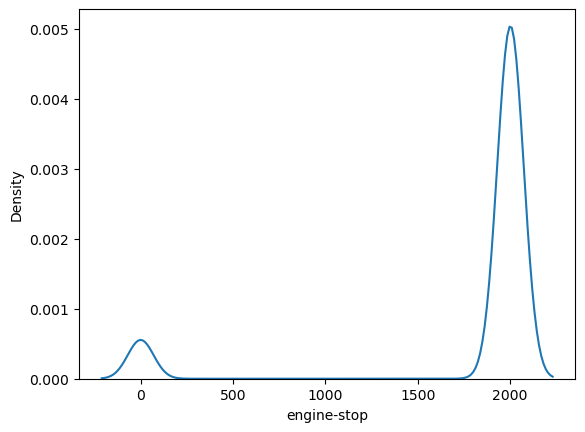

In [5]:
sns.kdeplot(data=df['engine-stop'])

In [7]:
df['engine-stop'].unique()

array([2018, 1993, 2003, 2005, 2017,    0, 1980, 2007, 1988, 1999, 1996,
       2006, 1997, 2000, 2008, 1982, 2009, 1981, 1977, 1998, 1978, 2014,
       2010, 2019, 1979, 2016, 2002, 1992, 1987, 2001, 2004, 2013, 2015,
       1991, 1995, 2012, 2011, 1975, 1990, 1970, 1967, 1989, 1953, 1986,
       1994, 1985, 1972, 1984, 1983, 1961, 1966, 1929, 1948, 1973, 1959,
       1968, 1971, 1962, 1976, 1935, 1974, 1909, 1957, 1938, 1939, 1964,
       1949, 1952, 1969, 1955, 1963, 1951, 1950, 1937, 1943, 1942, 1954,
       1960, 1958, 1932, 1931, 1945, 1965, 1941, 1956, 1940, 1936, 1933,
       1928, 1923, 1944, 1934, 1946, 1910, 1926, 1927, 1947], dtype=int64)

<AxesSubplot:xlabel='engine-stop', ylabel='Density'>

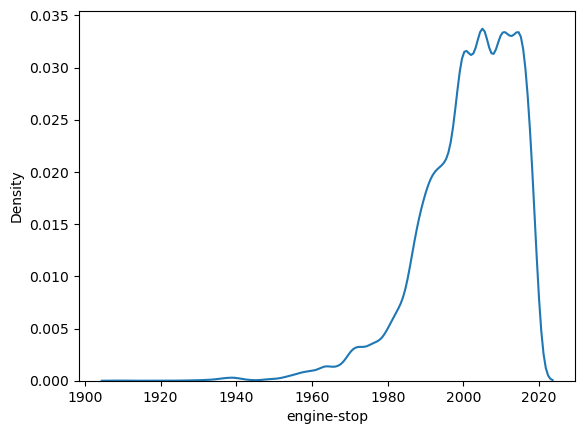

In [136]:
df = df[df['engine-stop'] != 0] #удаляем неулевые года
sns.kdeplot(data=df['engine-stop'])

In [137]:
def iqrr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Удаляем строки с выбросами
    good_df = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

    return good_df
columnss = ['target', 'valves','weight']
good_df = iqrr(df, columnss)

In [138]:
def iqrr(df, columns):
    mu = good_df[columns].mean()
    sigma = good_df[columns].std()
    ej_h = mu + 3 * sigma
    ej_l = mu - 3 * sigma
    good_df_1 = good_df[~((good_df[columns] < ej_l) | (good_df[columns] > ej_h)).any(axis=1)]
    return good_df_1


columnss = ['battery-capacity', 'compression', 'consumption-mixed', 'power-electro-kw',
         'configurations_tank-volume', 'configurations_back-wheel-base']
good_df_1 = iqrr(df, columnss)

In [139]:
good_df_1

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
5,8,8,-1.0,22100,9.6,6.0,0,4,2,2014,...,4,2,13,45.0,2017.0,10,3,0,1,2468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


## Baseline

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [141]:
X = good_df_1.drop(["target"], axis=1)
y = good_df_1[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [142]:
X

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1300.0,1,2,13,40.0,2018.0,16,3,0,1
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,1534.0,4,2,13,55.0,2019.0,35,3,0,1
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,1495.0,4,2,13,55.0,2003.0,10,3,0,1
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,1515.0,4,1,13,62.0,2005.0,10,3,0,1
5,8,8,-1.0,22100,9.6,6.0,0,4,2,2014,...,1437.0,4,2,13,45.0,2017.0,10,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1425.0,1,2,13,47.0,2016.0,15,3,0,1
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,1551.0,4,2,13,65.0,2015.0,10,3,0,1
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,1460.0,4,2,13,55.0,1999.0,16,3,0,1
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1548.0,1,2,13,70.0,2004.0,28,3,0,1


In [143]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)

In [144]:
test_X_st = scaler.transform(test_X)

In [145]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Lasso, Ridge
 
# создадим объект этого класса и запишем в переменную model
model_1 = Ridge()

# обучим нашу модель
model_1.fit(train_X_st, train_y)
print(model_1.coef_, model_1.intercept_)
predictions = model_1.predict(test_X_st)

[[-6.57189968e-01 -2.81609045e+00  0.00000000e+00  4.97667259e+01
  -7.14225120e+00 -9.50445187e-01  1.48131476e+00  2.66602678e+01
  -8.83697123e+00  1.31700603e+01 -2.19159677e+01 -1.78971149e+01
   2.34232688e+01 -1.41962486e+01 -1.57204459e+01  9.01446581e-02
  -1.29741548e+00 -2.42255251e+00 -4.11498067e+00  1.09829016e+01
  -3.20995608e+01  9.70191129e+01 -2.31849426e+00 -5.47783513e-01
   2.81637736e+01  2.79628650e+01 -1.59023078e+00 -4.14470121e+00
   7.46837200e-01  1.34879592e+00  5.64223511e-01]] [2637.71535076]


In [146]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(test_y, predictions)
rmse = mean_squared_error(test_y, predictions, squared=False)
mape = mean_absolute_percentage_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", round(mape * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 12075.072150765698
Среднеквадратическая ошибка (RMSE): 109.88663317604056
Средняя абсолютная ошибка  (MAPE): 2.99 %
Коэффициент детерминации (R^2): 0.6203558998509353


In [147]:
reg = LinearRegression().fit(train_X_st, train_y)

In [148]:
reg.score(train_X_st, train_y)

0.6089984319511839

In [149]:
mean_squared_error(reg.predict(train_X_st), train_y)

12309.539038746641

Добавляем валидационную выборку:

In [150]:
scores = cross_validate(reg, train_X_st, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [151]:
scores

{'fit_time': array([0.02597213, 0.02753949, 0.02499843]),
 'score_time': array([0.00403857, 0.00299239, 0.00300097]),
 'test_score': array([-12700.21364885, -12356.21204171, -12002.08878213])}

In [92]:
mean_squared_error(reg.predict(test_X_st), test_y)

12074.919733697827

Таким образом, путем удаления нулевых строк и очистки данных от выбросов двумя соспособами мне удалось поднять детерминацию с 38% до 62% и снизить MSE с 28000 до 12075, значит, что наш проноз будет иметь ошибку в 3%. Я думаю, что можно будет попытаться повысить точность модели путем отбора факторов в модель. <br>
Кроме того, различные преобразования данных (логарифмирование и применение метода Бокса-Кокса) тоже не принесли результатов, а где-то даже ухудшали ситуацию. 